<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine-Learning-Algorithms/blob/main/08-FFNN-and-RNN/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---

# **Feedforward Neural Network (FFNN)**

---
---

A FeedForward Neural Network (FFNN) is one of the simplest types of artificial neural networks devised. In this network, **the information moves** in only one direction —**forward**— **from the input nodes, through the hidden nodes** (if any), and to the output nodes. **There are no cycles or loops in the network**.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, accuracy_score, recall_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model, to_categorical

We are going to generate a synthetic data of 2 circles, one inside of the other. **This is a non-linear dataset**.

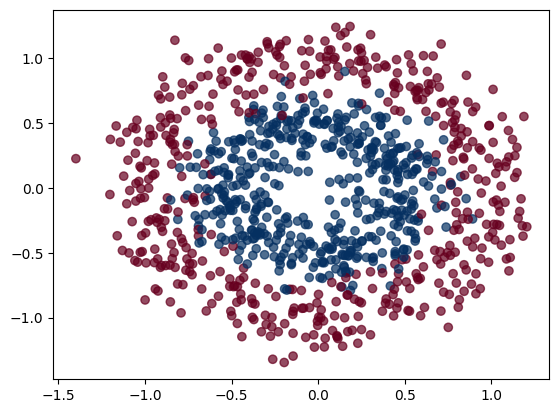

In [87]:
# Generate synthetic data
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.15, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap="RdBu", alpha=0.7)
plt.show()

To train and test the model, we separate the data. In this case, 30% of the data will be used to test the model and the rest to training previously. Also we're going to standardize the dataset. It is recommended in Neural Networks in general.

In [88]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building an FFNN model with two hidden layers, each with 10 neurons and ReLU activation functions, followed by an output layer with a single neuron using the sigmoid activation function for binary classification. Also compiling the model with the Adam optimizer, binary cross-entropy loss function, and accuracy as the metric.

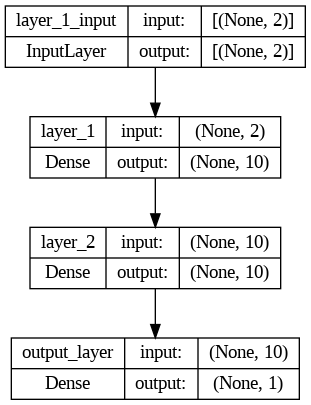

In [89]:
# Build the FFNN model
ffnn = Sequential([
    Dense(10, input_shape=(2,), activation='relu', name='layer_1'),
    Dense(10, activation='relu', name='layer_2'),
    Dense(1, activation='sigmoid', name='output_layer')
])

# Compile the model
ffnn.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Show the model
plot_model(ffnn, to_file='ffnn_model_plot.png', show_shapes=True, show_layer_names=True)

We will train the model using the training data without showing progress (verbose=0) for cleanliness of the notebook. Printing out the precision, accuracy, and recall of the model based on the test data.

In [90]:
# Train the model
history = ffnn.fit(X_train, y_train, epochs=100, verbose=0)

# Predict on test set
y_pred = ffnn.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

# Evaluate the model
precision = precision_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

10/10 [==============================] - 0s 3ms/step
Accuracy: 0.9100
Precision: 0.8926
Recall: 0.9236


In [91]:
def plot_decision_boundary(model, X, y):
    # Define the canvas size
    plt.figure(figsize=(10, 6))

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.1

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    try:
        # Predict the function value for the whole grid
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    except:
        # RNN version
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()].reshape(-1, 1, 2))
        Z = np.argmax(Z, axis=1).reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='RdBu')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Decision Boundary")

117/117 [==============================] - 0s 2ms/step


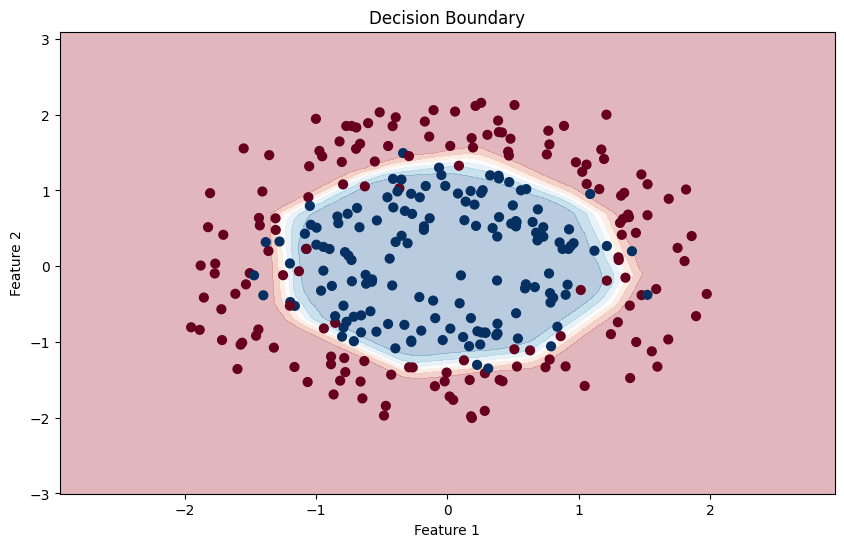

In [92]:
# Call the plot_decision_boundary function
plot_decision_boundary(ffnn, X_test, y_test)
plt.show()

---
---

# **Recurrent Neural Network (RNN)**

---
---

A Recurrent Neural Network (RNN) is one of the two broad types of artificial neural network, characterized by direction of the flow of information between its layers. In contrast to the uni-directional feedforward neural network, **it is a bi-directional artificial neural network**, meaning that **it allows the output from some nodes to affect subsequent input to the same nodes**.

In [93]:
# Since RNNs require 3D input, we can add an extra dimension to X to create sequences of length 1
X_rnn = np.expand_dims(X, axis=1)  # Shape will be (1000, 1, 2)

Separating the data into training and testing.

In [94]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y, test_size=0.3, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 2)).reshape(-1, 1, 2)
X_test = scaler.transform(X_test.reshape(-1, 2)).reshape(-1, 1, 2)

One-hot encoding is often used to indicate the state of a state machine. **One-Hot-Encoding has the advantage that the result is binary** rather than ordinal and that everything is in an orthogonal vector space.

In [95]:
# One-hot encode the targets
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

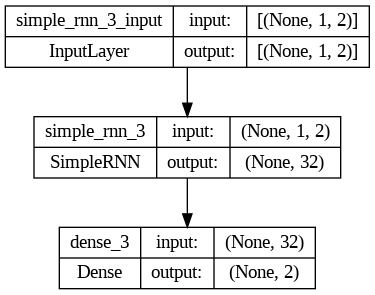

In [96]:
# Build the RNN model
rnn = Sequential()
rnn.add(SimpleRNN(32, input_shape=(1, 2), activation='relu'))  # input_shape is (timesteps, features)
rnn.add(Dense(2, activation='softmax'))  # Output layer for two classes

# Compile the model
rnn.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Show the model
plot_model(rnn, to_file='ffnn_model_plot.png', show_shapes=True, show_layer_names=True)

In [97]:
# Train the model
rnn.fit(X_train, y_train_categorical, epochs=100, verbose=0)

# Evaluate the model on the test set
test_loss, test_accuracy = rnn.evaluate(X_test, y_test_categorical, verbose=0)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Test Loss: 0.22158609330654144, Test Accuracy: 0.9133333563804626


In [98]:
# Predict the classes
y_pred = rnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate Precision, Recall and F1 score
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.93      0.90      0.92       156
     Class 1       0.90      0.92      0.91       144

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



117/117 [==============================] - 0s 2ms/step


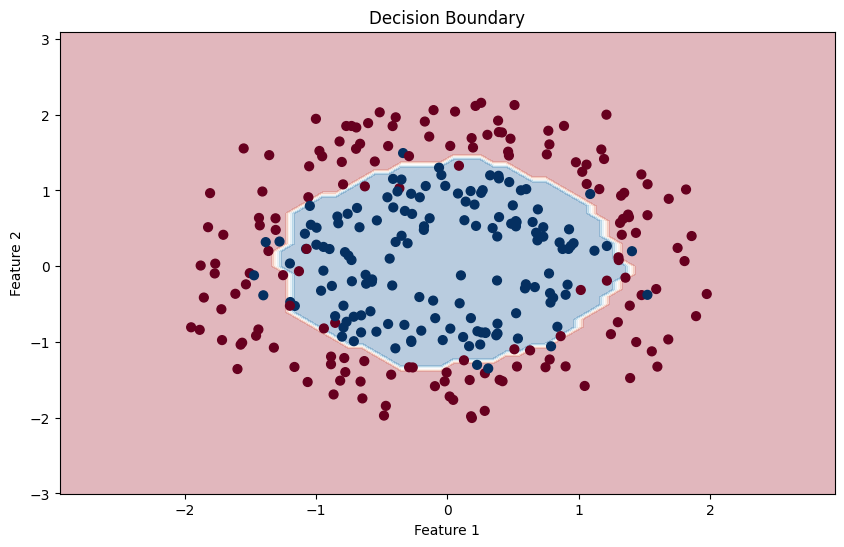

In [99]:
# Call the plot_decision_boundary function
plot_decision_boundary(rnn, X_test[:,0], y_test)
plt.show()

With the same dataset, the models perform as you see in the following table

\begin{array}{c} \hline
Metrics & FFNN & RNN  \\ \hline
Accuracy & 0.91 & 0.91  \\
Precision & 0.89 & 0.91 \\
Recall & 0.92 & 0.91 \\ \hline
\end{array}

